# Comparison: Numerov - Whittaker
This notebook compares the Numerov method (with and without model potentials) to the Whittaker method for calculating Rydberg wavefunctions and matrix elements.

In [1]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from rydstate import RydbergStateAlkali

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")

## Wavefunction

In [2]:
states: dict[str, RydbergStateAlkali] = {}

In [3]:
state = RydbergStateAlkali("Rb", n=21, l=0, j=0.5)

state.radial.create_model(potential_type="model_potential_marinescu_1993")
state.radial.create_wavefunction("numerov")
states["Numerov with Model Potentials"] = state

# Using Numerov without model potentials will lead to some warnings,
# since the resulting wavefunction does not pass all heuristic checks
state_without_mp = RydbergStateAlkali(state.species, state.n, state.l, state.j)
state_without_mp.radial.create_model(potential_type="coulomb")
state_without_mp.radial.create_wavefunction("numerov")
states["Numerov without Model Potentials"] = state_without_mp

WARNING wavefunction.py: The wavefunction for the state RadialState(Rb, n=21, nu=np.float64(17.86825962895559), l_r=0) has some issues:
      The wavefunction is not close to zero at the inner boundary (inner_weight_scaled_to_whole_grid=1.24e-04)
      The wavefunction has 17 nodes, but should have 20 nodes.
      The integration for l=0 did stop at 0.14 (should be close to zero).


In [4]:
state_whittaker = RydbergStateAlkali(state.species, state.n, state.l, state.j)
state_whittaker.radial.create_grid(x_min=state.radial.grid.x_min, x_max=state.radial.grid.x_max)
state_whittaker.radial.create_wavefunction("whittaker")
states["Whittaker"] = state_whittaker

WARNING wavefunction.py: Using Whittaker to get the wavefunction is not recommended! Use this only for comparison.


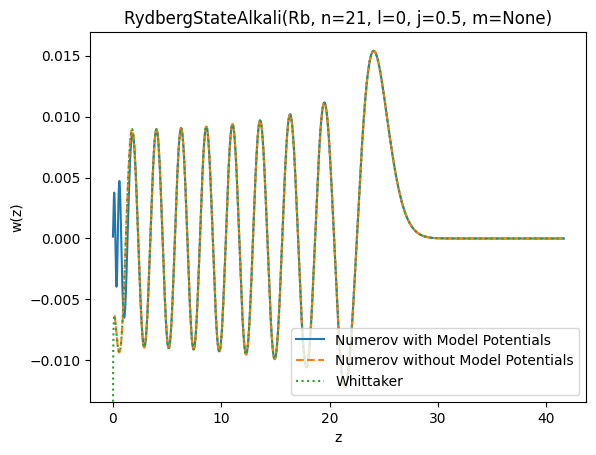

In [5]:
fig, ax = plt.subplots()
ax.set_title(str(state))

styles = ["-", "--", ":"]
for i, (label, _state) in enumerate(states.items()):
    ax.plot(_state.radial.grid.z_list, _state.radial.wavefunction.w_list, ls=styles[i], label=label)
ax.legend()

ax.set_xlabel("z")
ax.set_ylabel("w(z)")

ax.set_ylim(1.1 * np.min(state.radial.wavefunction.w_list), 1.1 * np.max(state.radial.wavefunction.w_list))

plt.show()

## Radial matrix elements

In [6]:
state1 = RydbergStateAlkali("Rb", n=10, l=0, j=0.5)
state2 = RydbergStateAlkali("Rb", n=9, l=1, j=1.5)

dipole_me = state1.radial.calc_matrix_element(state2.radial, 1)
print(f"Numerov with model potentials: {dipole_me}", flush=True)

_state1 = RydbergStateAlkali(state1.species, state1.n, state1.l, state1.j)
_state1.radial.create_model(potential_type="coulomb")
_state2 = RydbergStateAlkali(state2.species, state2.n, state2.l, state2.j)
_state2.radial.create_model(potential_type="coulomb")

dipole_me = _state1.radial.calc_matrix_element(_state2.radial, 1)
print(f"Numerov without model potentials: {dipole_me}", flush=True)

# For Whittaker we use the same integration bounds as Numerov without model potentials,
# to avoid integrating over the diverging peak at the origin (see plots above)
xmin1, xmax1 = _state1.radial.grid.x_min, _state1.radial.grid.x_max
xmin2, xmax2 = _state2.radial.grid.x_min, _state2.radial.grid.x_max
_state1 = RydbergStateAlkali(state1.species, state1.n, state1.l, state1.j)
_state1.radial.create_grid(x_min=xmin1, x_max=xmax1)
_state1.radial.create_wavefunction("whittaker")
_state2 = RydbergStateAlkali(state2.species, state2.n, state2.l, state2.j)
_state2.radial.create_grid(x_min=xmin2, x_max=xmax2)
_state2.radial.create_wavefunction("whittaker")

dipole_me = _state1.radial.calc_matrix_element(_state2.radial, 1)
print(f"Whittaker: {dipole_me}", flush=True)

Numerov with model potentials: 43.64042739463778 bohr


WARNING wavefunction.py: The wavefunction for the state RadialState(Rb, n=10, nu=np.float64(6.864783105371448), l_r=0) has some issues:
      The wavefunction has 6 nodes, but should have 9 nodes.
      The integration for l=0 did stop at 0.14 (should be close to zero).
WARNING wavefunction.py: The wavefunction for the state RadialState(Rb, n=9, nu=np.float64(6.350837333725099), l_r=1) has some issues:
      The wavefunction is not close to zero at the inner boundary (inner_weight_scaled_to_whole_grid=4.07e-02)
      The wavefunction has 5 nodes, but should have 7 nodes.


Numerov without model potentials: 43.60588874251313 bohr


WARNING wavefunction.py: Using Whittaker to get the wavefunction is not recommended! Use this only for comparison.
WARNING wavefunction.py: Using Whittaker to get the wavefunction is not recommended! Use this only for comparison.


Whittaker: 43.56160364558853 bohr
